In [1]:
import glob
import os

import pandas as pd

# Get list of all CSV files in the directory
list_of_files = glob.glob("../../logs/performance/*.csv")

# Find the latest file
latest_file = max(list_of_files, key=os.path.getctime)

# Load the latest CSV file into a DataFrame
df_latest = pd.read_csv(latest_file)
# format: "timestamp", "category", "test_name","query", "scenario", "execution_time""cache_hits", "cache_misses", "cache_size","results_consistent",

print(df_latest)

               timestamp                category  \
0    2025-02-11 18:46:07    base_keyword_queries   
1    2025-02-11 18:46:07    base_keyword_queries   
2    2025-02-11 18:46:07    base_keyword_queries   
3    2025-02-11 18:46:07    base_keyword_queries   
4    2025-02-11 18:46:07    base_keyword_queries   
..                   ...                     ...   
271  2025-02-11 18:46:37  n_way_combined_queries   
272  2025-02-11 18:46:38  n_way_combined_queries   
273  2025-02-11 18:46:38  n_way_combined_queries   
274  2025-02-11 18:46:38  n_way_combined_queries   
275  2025-02-11 18:46:38  n_way_combined_queries   

                                         test_name  \
0                           double_wildcard_search   
1                           double_wildcard_search   
2                           double_wildcard_search   
3                           double_wildcard_search   
4                                  wildcard_search   
..                                             ... 

<Axes: title={'center': 'Execution time per scenario'}, xlabel='scenario'>

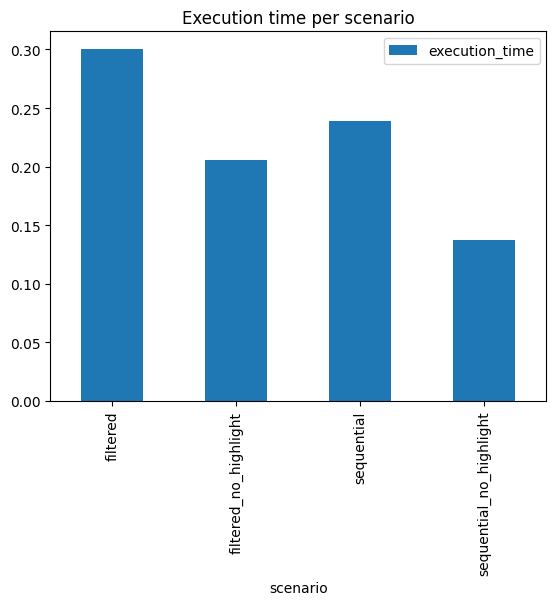

In [2]:
# plot execution_time per senario only category "n_way_combined_queries"
n_way_combined_queries = df_latest[df_latest["category"] == "n_way_combined_queries"]
scenario = n_way_combined_queries[["scenario", "execution_time"]]
scenario = scenario.groupby("scenario").mean()
scenario.plot(kind="bar", title="Execution time per scenario")

/home/leonard/Dokumente/GitHub/fainder-demo/.venv/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


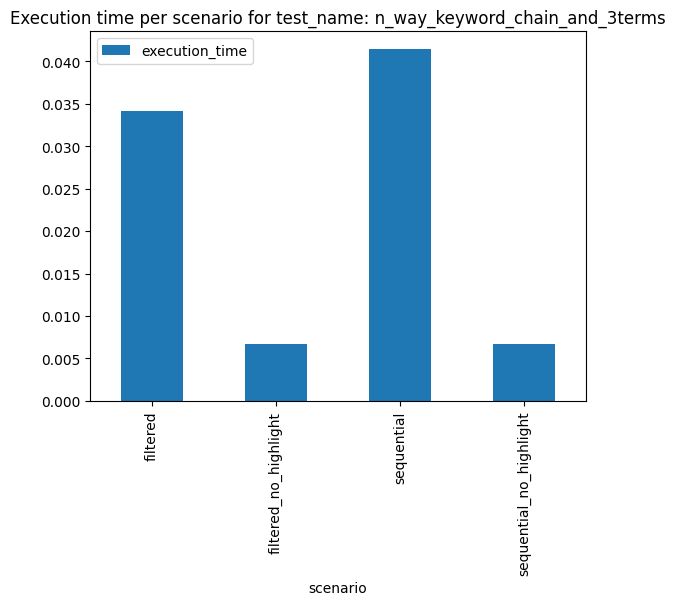

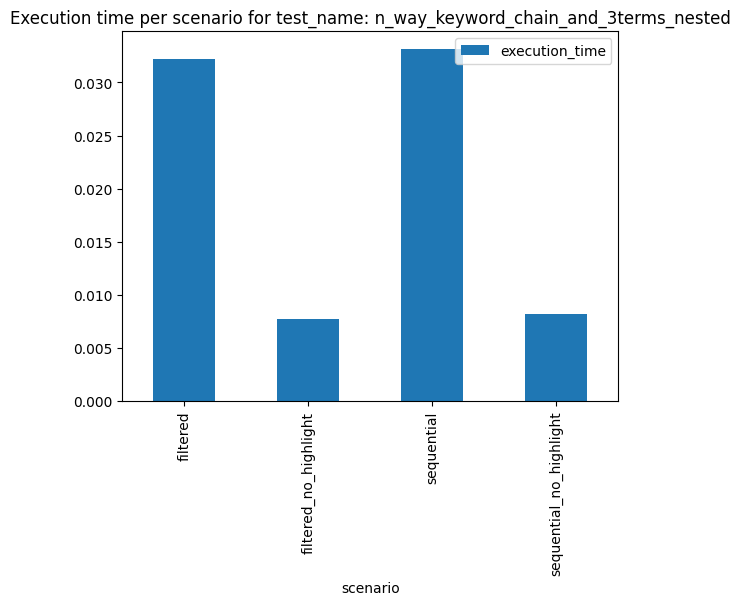

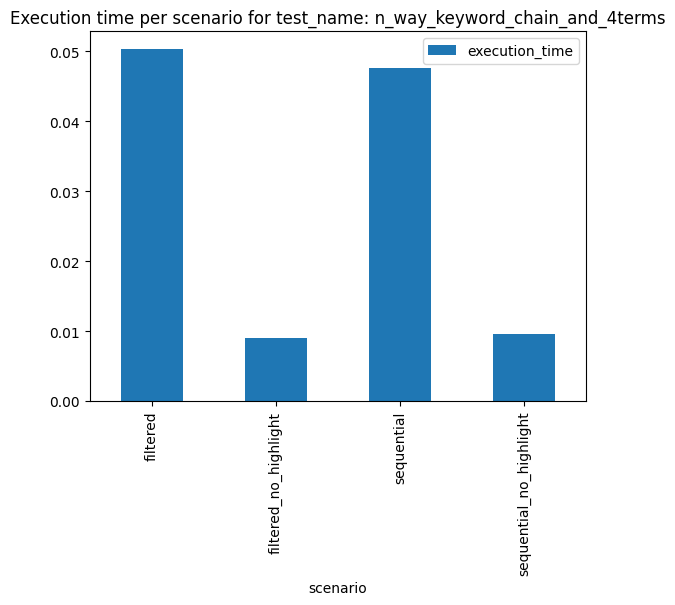

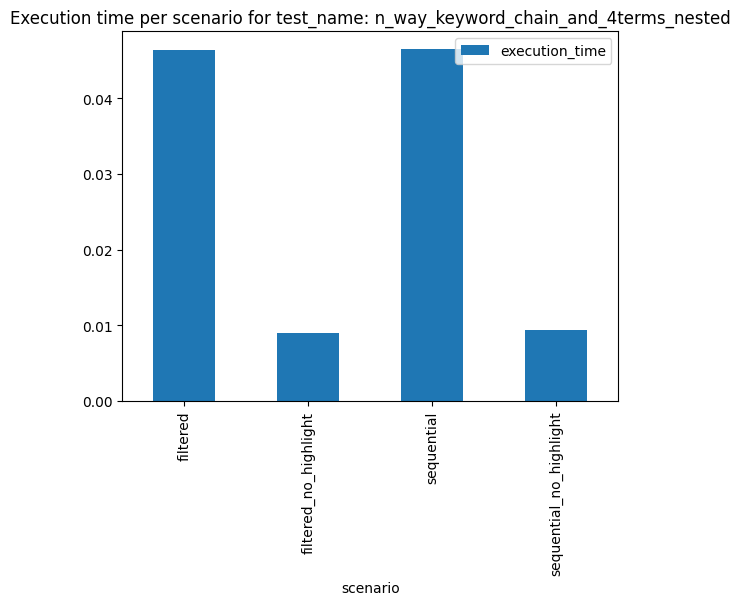

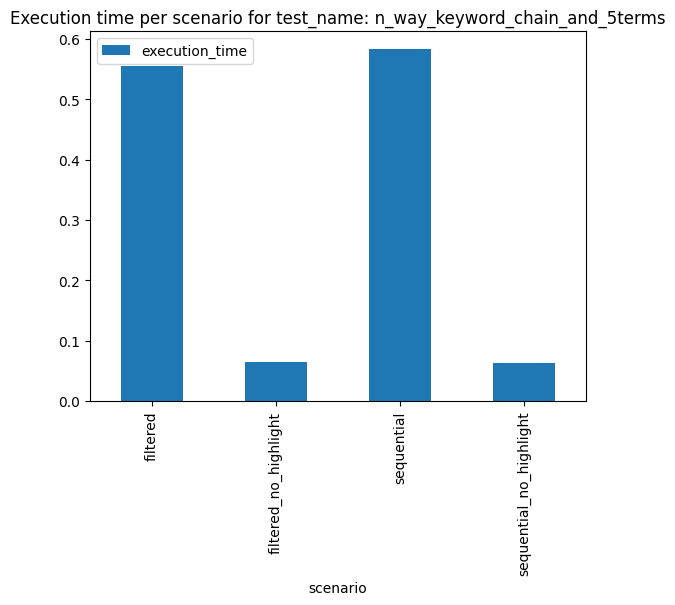

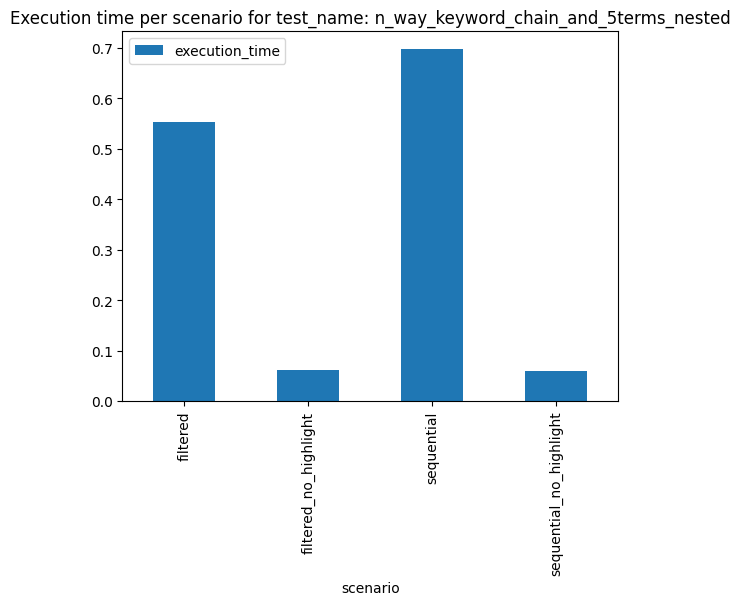

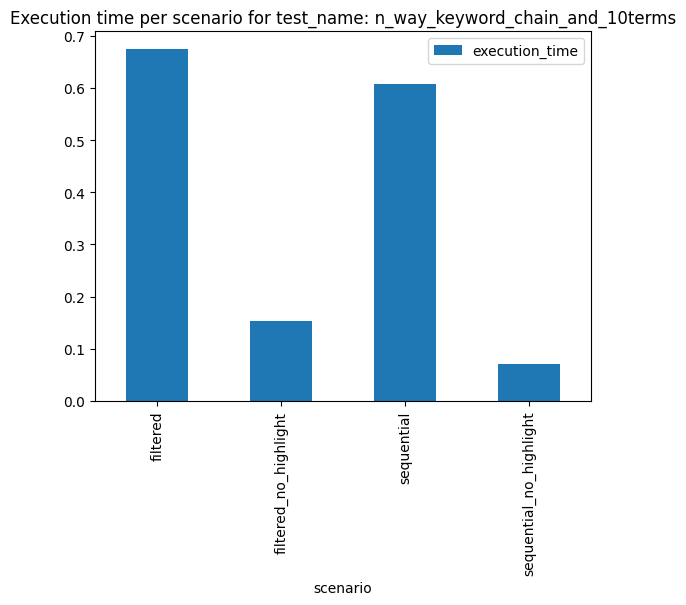

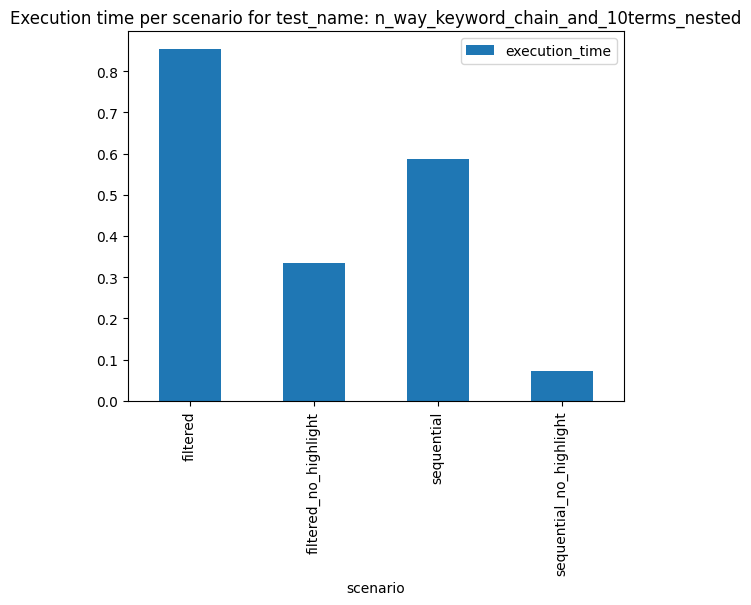

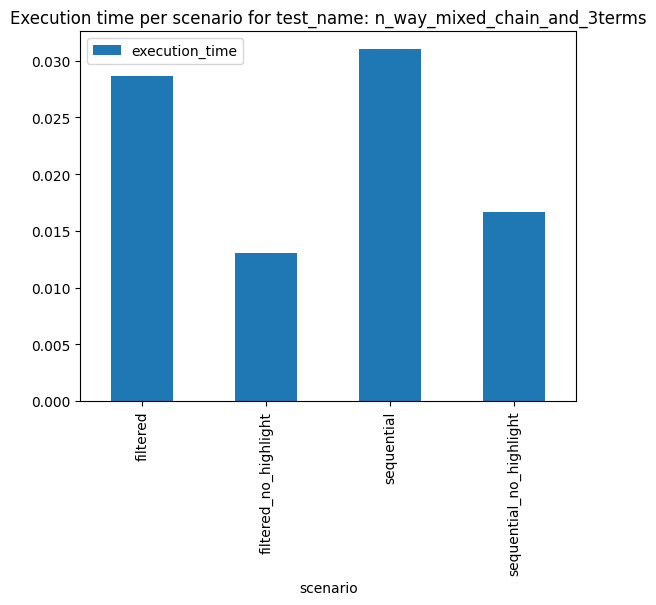

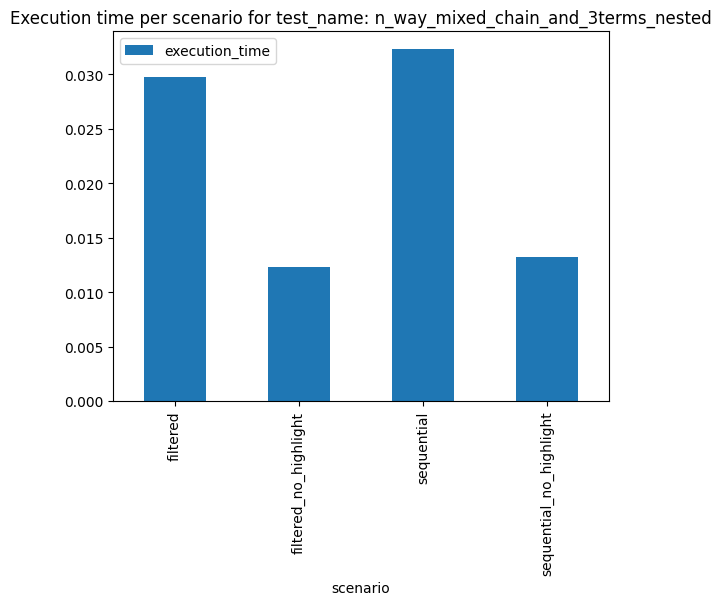

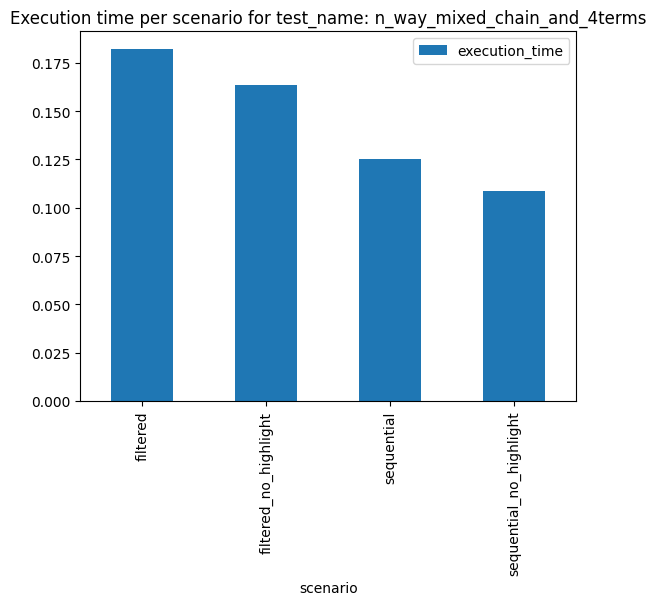

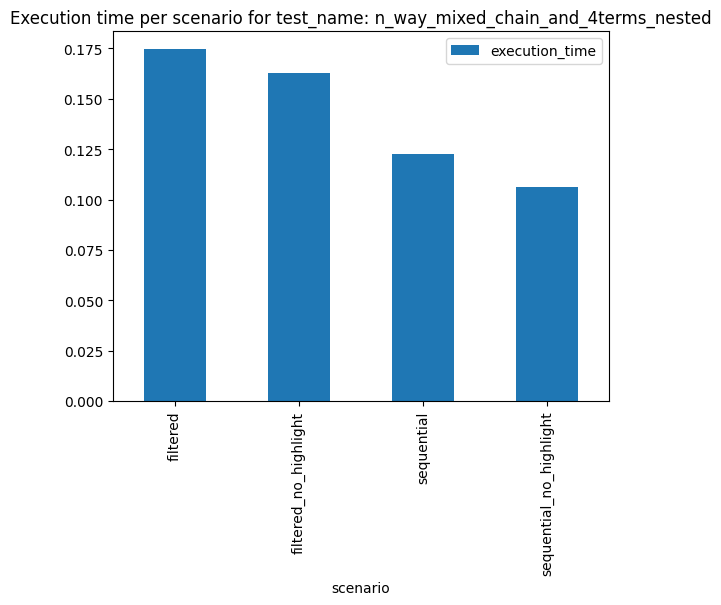

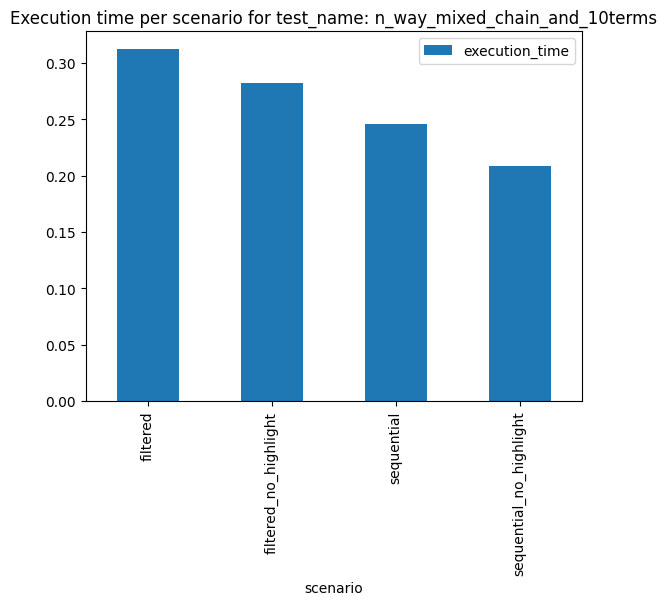

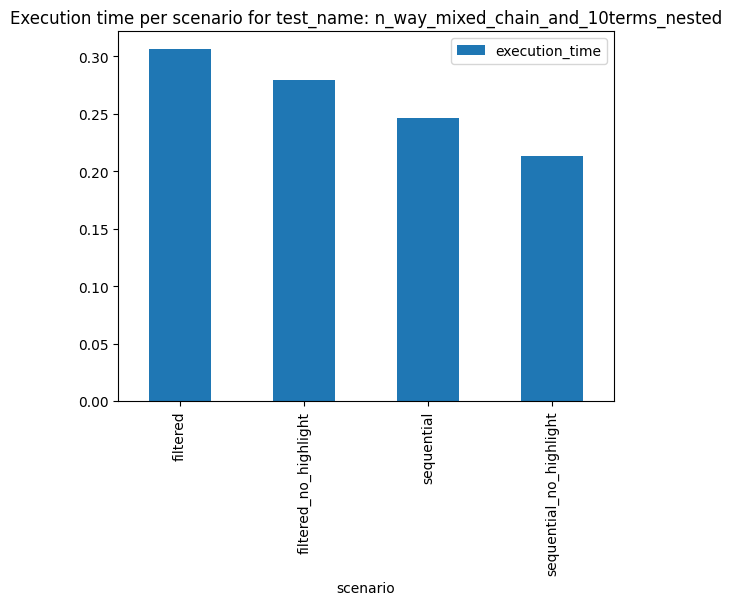

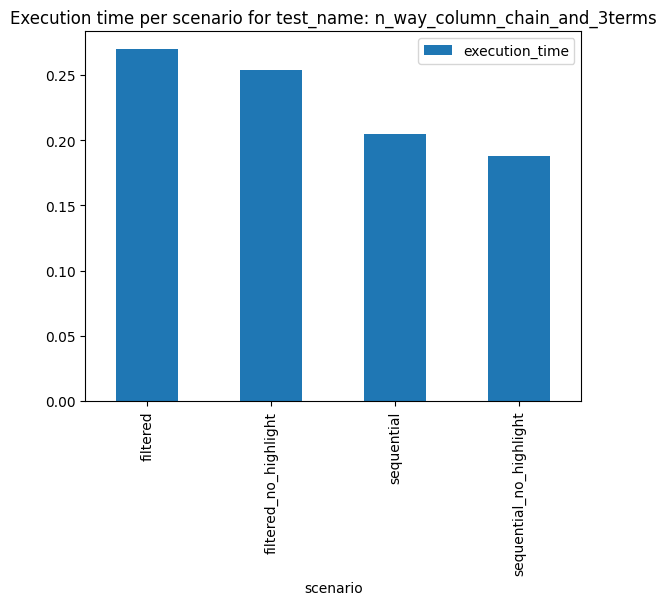

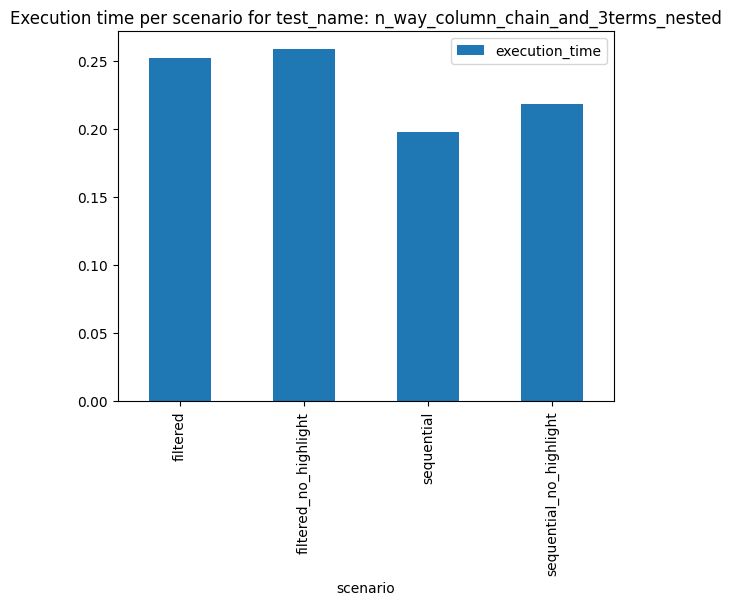

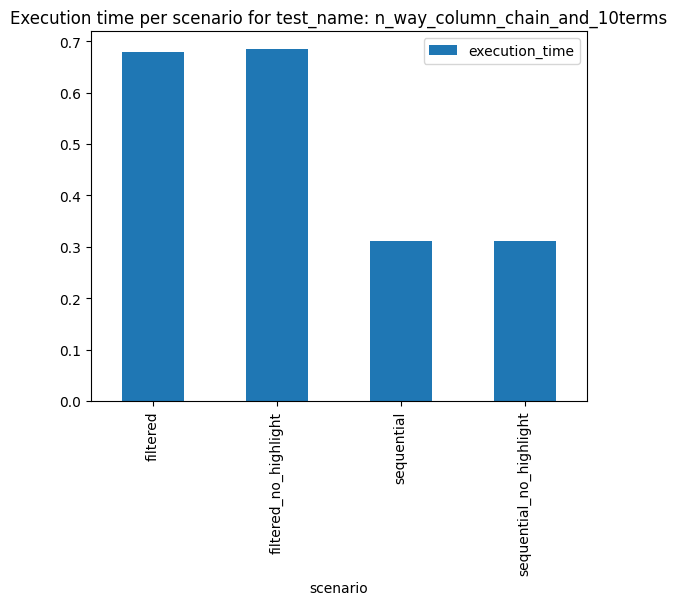

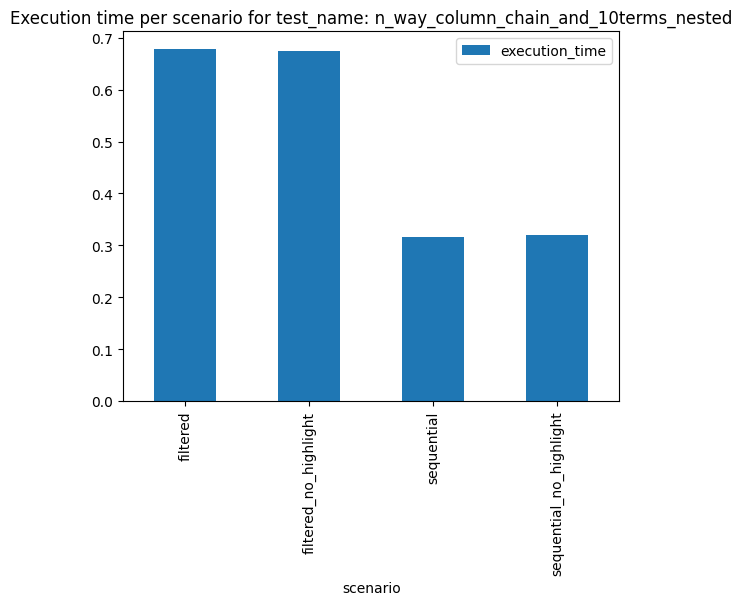

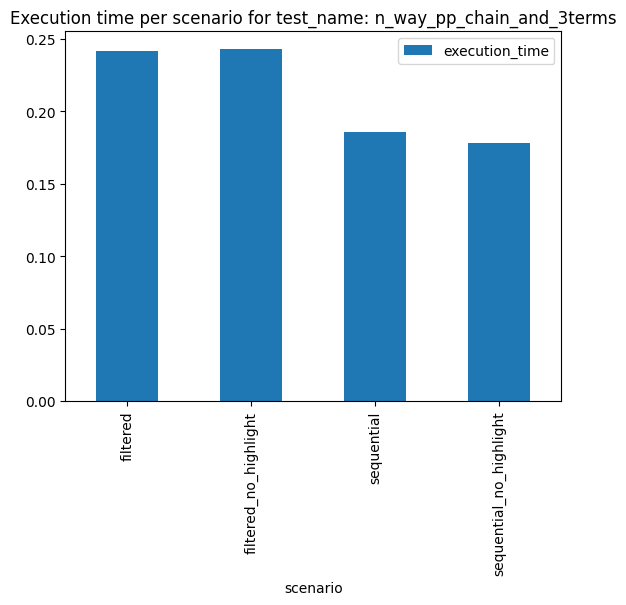

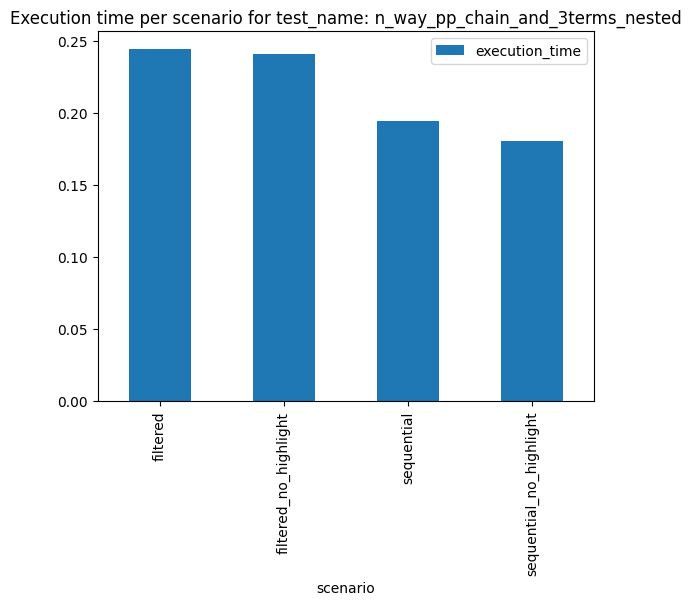

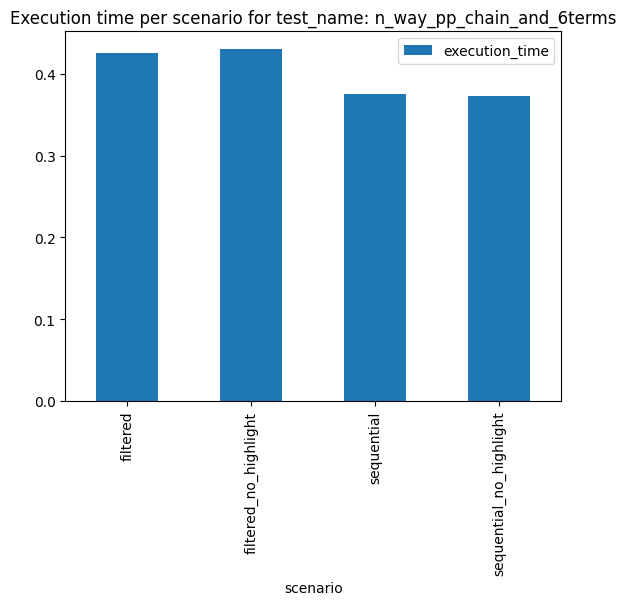

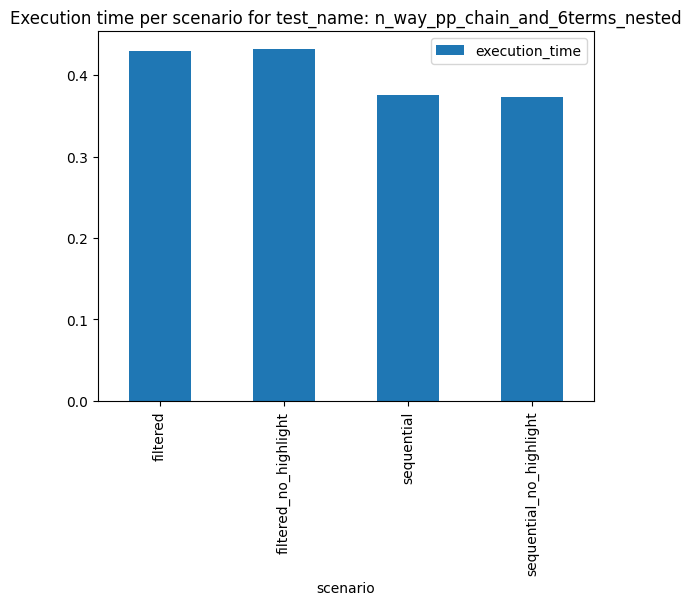

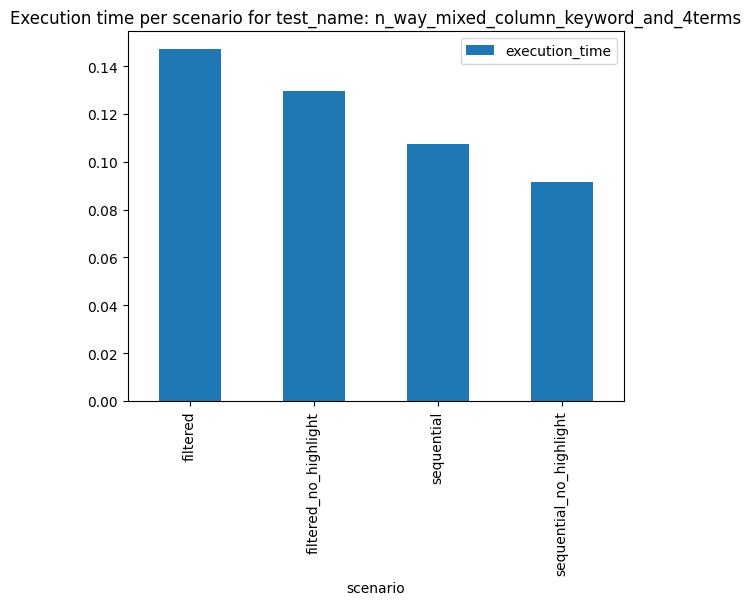

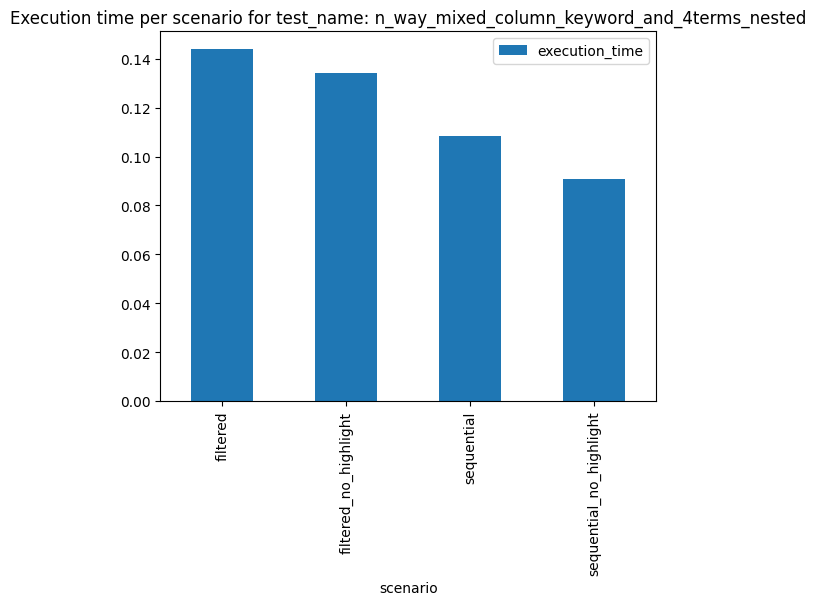

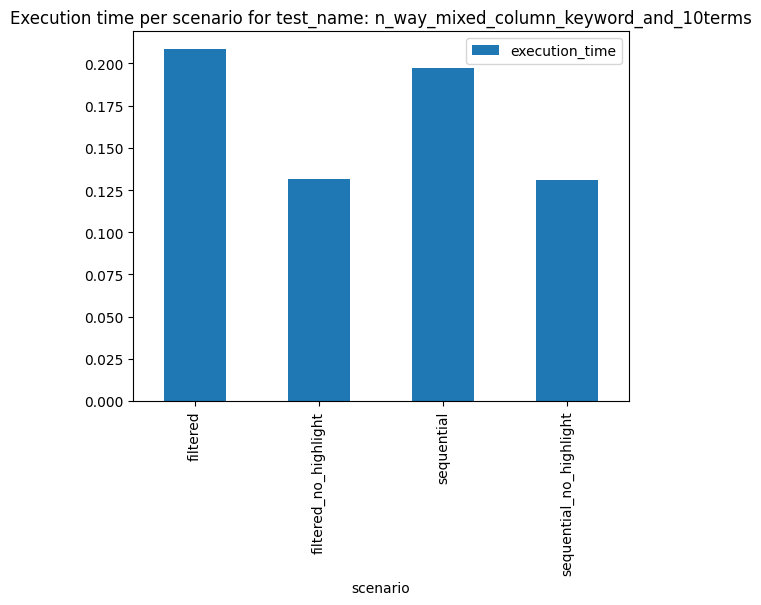

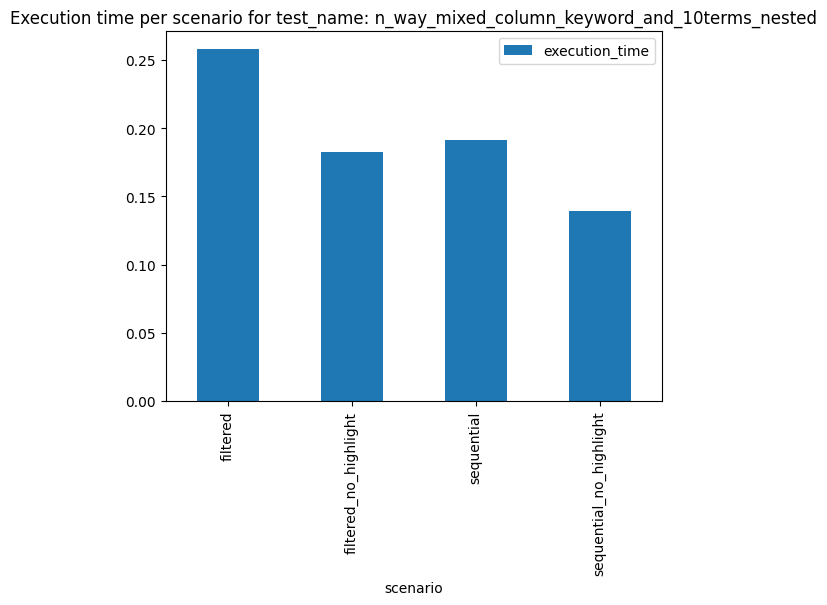

In [3]:
# plot execution_time per senario only category "n_way_combined_queries" for each test_name
n_way_combined_queries = df_latest[df_latest["category"] == "n_way_combined_queries"]
test_names = n_way_combined_queries["test_name"].unique()
for test_name in test_names:
    df_latest = n_way_combined_queries[n_way_combined_queries["test_name"] == test_name]
    df_latest = df_latest[["scenario", "execution_time"]]
    df_latest = df_latest.groupby("scenario").mean()
    df_latest.plot(kind="bar", title="Execution time per scenario for test_name: " + test_name)